In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 # importing the necessary libs
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import io
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import EfficientNetB4
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.applications import EfficientNetB4
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [3]:
# Define the class names for the image classification
class_names = ['Final AD JPEG', 'Final CN JPEG', 'Final MCI JPEG']

In [4]:
# Define the size of the images
image_size = 150

In [7]:
# Prepare the training images and labels
train_images = []
train_labels = []

for class_name in class_names:
    folder_path = os.path.join('//content/drive/MyDrive/adni_dataset/project_dataset/adni/Alzheimers-ADNI/', 'train', class_name)
    for image_file in tqdm(os.listdir(folder_path)):
        image = cv2.imread(os.path.join(folder_path, image_file))
        image = cv2.resize(image, (image_size, image_size))
        train_images.append(image)
        train_labels.append(class_name)

100%|██████████| 463/463 [00:10<00:00, 43.32it/s] 


In [8]:
len(train_images)

1111

In [9]:
len(train_labels)

1111

In [12]:
# Prepare the test images and labels
test_images = []
test_labels = []

for class_name in class_names:
    folder_path = os.path.join('//content/drive/MyDrive/adni_dataset/project_dataset/adni/Alzheimers-ADNI/', 'test', class_name)
    for image_file in tqdm(os.listdir(folder_path)):
        image = cv2.imread(os.path.join(folder_path, image_file))
        image = cv2.resize(image, (image_size, image_size))
        test_images.append(image)
        test_labels.append(class_name)

100%|██████████| 82/82 [00:30<00:00,  2.67it/s]


In [13]:
# Convert the training images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [14]:
# Randomly shuffle the dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

In [15]:
# Encode the training and test labels
train_labels_encoded = []
test_labels_encoded = []

for label in train_labels:
    train_labels_encoded.append(class_names.index(label))

train_labels = to_categorical(train_labels_encoded)

for label in test_labels:
    test_labels_encoded.append(class_names.index(label))

test_labels = to_categorical(test_labels_encoded)

In [16]:
num_classes =len(class_names)

In [17]:
num_classes

3

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, Rescaling

# Define the input dimensions and number of classes
img_height = 224  # Replace with your actual image height
img_width = 224   # Replace with your actual image width
num_classes = 3  # Replace with your number of classes

# Define your model
model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))  # Use Rescaling directly

# Add convolutional and pooling layers
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))  # Final layer with 'num_classes' units


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,627 (24.59 MB)

 Trainable params: 6,446,627 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [27]:
# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,627 (24.59 MB)

 Trainable params: 6,446,627 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
train_data_dir = "/content/drive/MyDrive/adni_dataset/project_dataset/adni/Alzheimers-ADNI/train"


In [45]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  # Use 10% of the data as validation set
)


In [46]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # This uses 90% of data for training
)

Found 1001 images belonging to 3 classes.


In [47]:
val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # This uses 10% of data for validation
)

Found 110 images belonging to 3 classes.


In [48]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint(
    "model.keras",
    monitor='val_accuracy',  # Monitor validation accuracy
    verbose=1,
    save_best_only=True,
    mode='auto'
)

In [49]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    factor=0.3,
    patience=2,
    verbose=1,
    mode='auto',
    min_delta=0.001
)


In [50]:
history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs as needed
    validation_data=val_generator,  # Use the validation generator
    callbacks=[tensorBoard, checkPoint, reduce_lr]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4186 - loss: 3.3074
Epoch 1: val_accuracy improved from -inf to 0.35455, saving model to model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4185 - loss: 3.2637 - val_accuracy: 0.3545 - val_loss: 1.0134 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4309 - loss: 1.0157
Epoch 2: val_accuracy improved from 0.35455 to 0.47273, saving model to model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4313 - loss: 1.0149 - val_accuracy: 0.4727 - val_loss: 0.9880 - learning_rate: 0.0010
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4440 - loss: 0.9780
Epoch 3: val_accuracy did not improve from 0.47273
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.4438 - loss: 0.9786 - val_accuracy: 0.4182 - val_loss: 0.9939 - learning_rate: 0.0010
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4648 - loss: 0.9819
Epoch 4: val_accuracy did not improve from 0.4

In [ ]:
# Make predictions on the test images
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1)

4/4 [==============================] - 10s 1s/step


In [ ]:
# Print the classification report
print(classification_report(actual_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.61      0.60      0.61        55
           2       0.49      0.63      0.55        41

    accuracy                           0.57       111
   macro avg       0.70      0.50      0.53       111
weighted avg       0.62      0.57      0.56       111



In [ ]:
# Generate the confusion matrix
confusion_matrix = confusion_matrix(actual_labels, predictions)

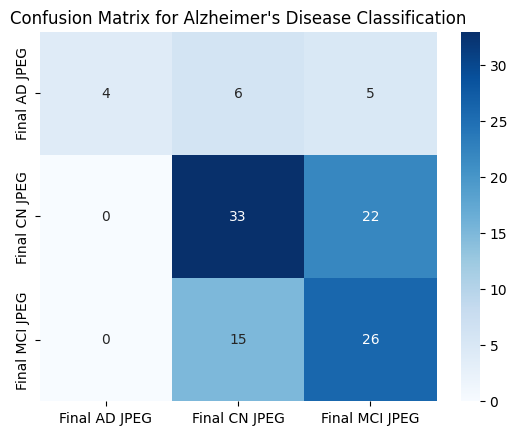

In [ ]:
# Plot the confusion matrix
ax = plt.axes()

sns.heatmap(confusion_matrix, cmap='Blues', annot=True,
            annot_kws={'size': 10},
            xticklabels=class_names,
            yticklabels=class_names,
            ax=ax)

plt.title("Confusion Matrix for Alzheimer's Disease Classification")
plt.show()

In [ ]:
# Function to plot accuracy and loss
def plot_accuracy_and_loss(model_data):
    fig = plt.figure(figsize=(12, 12))
    plt.subplot(221)
    plt.plot(model_data.history["accuracy"], 'bo--', label='accuracy')
    plt.plot(model_data.history["val_accuracy"], 'ro--', label='val_accuracy')
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.legend()
    plt.tight_layout()
    plt.subplot(222)
    plt.plot(model_data.history["loss"], 'bo--', label='loss')
    plt.plot(model_data.history["val_loss"], 'ro--', label='val_loss')
    plt.title("Training Data Loss Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.legend()
    plt.tight_layout()

C:\Users\rushi\AppData\Local\Temp\ipykernel_6324\3625458366.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


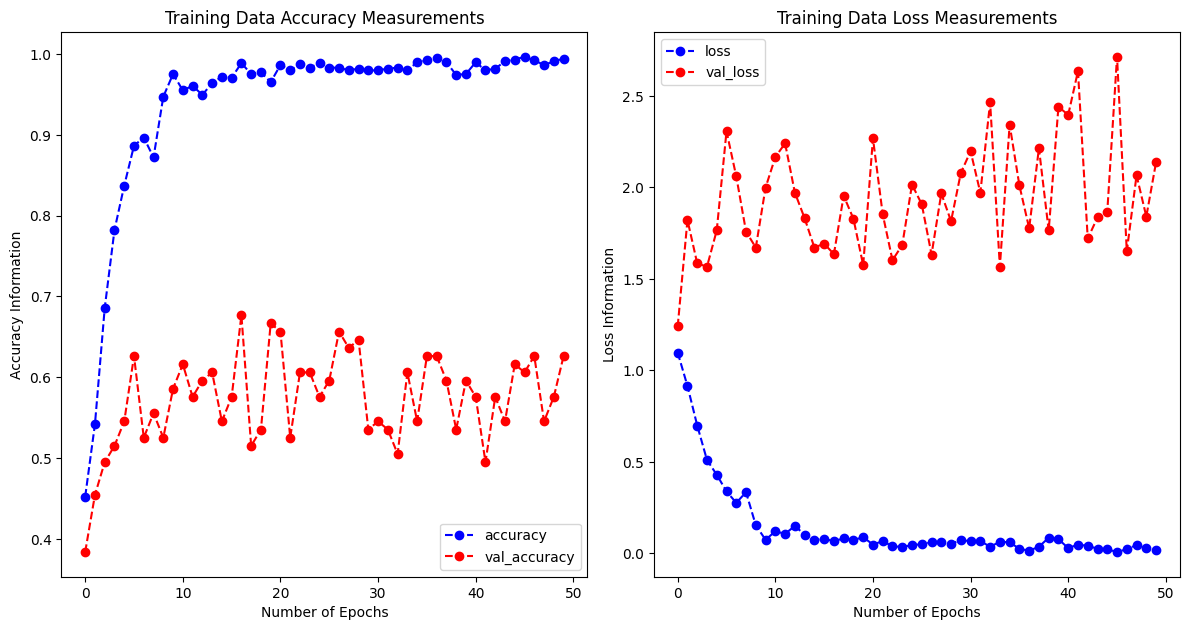

In [ ]:
# Plot accuracy and loss
plot_accuracy_and_loss(history)

In [ ]:
# Function to predict an image
def predict_image(Imagename):
    print("started")

    #for name, fileinfo in upload.value.items():
    image = Image.open(Imagename)


    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (image_size, image_size))
    image = image.reshape(1, image_size, image_size, 3)
    prediction = model.predict(image)
    prediction = np.argmax(prediction, axis=1)[0]

    if prediction == 0:
        prediction = "Final AD JPEG"
    elif prediction == 1:
        prediction = "Final CN JPEG"
    elif prediction == 2 :
        prediction = "Final MCI JPEG"
    print(f"Model predicts that it is a {prediction}")

In [ ]:
# Test the input image
predict_image("C:/Users/rushi/OneDrive/Desktop/adni/Alzheimers-ADNI/test/Final MCI JPEG/ADNI_016_S_5007_MR_Axial_T2_Star__br_raw_20150227153131109_22_S250069_I475205.jpg")
predict_image("C:/Users/rushi/OneDrive/Desktop/adni/Alzheimers-ADNI/test/Final CN JPEG/ADNI_002_S_6007_MR_Axial_T2_STAR__br_raw_20180423110908167_22_S679010_I988541.jpg")



started
1/1 [==============================] - 0s 112ms/step
Model predicts that it is a Final CN JPEG
started
1/1 [==============================] - 0s 109ms/step
Model predicts that it is a Final MCI JPEG
